In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [3]:
bp_df = pd.read_csv(DATA_PATH)

In [4]:
bp_df.head()

,record_id,group,age,gender,handedness,ses_ladder_rung,history_smoking,frequency_currentsmoking,age_at_first_mood_syndrome,madrs_score,...,31p_cc_ant_gatp,31p_cc_ant_gatpr,31p_cc_ant_aatp,31p_cc_ant_aatpr,31p_l_pat_ph,31p_l_pat_pcr,31p_l_pat_gatp,31p_l_pat_gatpr,31p_l_pat_aatp,31p_l_pat_aatpr
0,1035,Case,29,Female,Right,2,Past Smoker,Not at all,14.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1637,Case,52,Female,Right,3,NaN,NaN,6.0,23,...,5918480.0,0.630314,8678260.0,0.790509,7.24003,10736800.0,3556370.0,0.490448,3544560.0,0.448918
2,1462,Case,51,Female,Right,4,Never Smoker,Not at all,33.0,28,...,8242230.0,0.921422,3362510.0,0.445127,7.16535,11783200.0,6115790.0,0.580259,4545140.0,0.530136
3,1264,Case,57,Female,Right,4,Never Smoker,Not at all,16.0,13,...,9900240.0,0.720967,3497420.0,0.562180,7.23599,8189780.0,5744920.0,0.705318,3075420.0,0.444548
4,1263,Case,41,Female,Right,9,Current Smoker,Some days,11.0,28,...,13869000.0,0.529107,6048170.0,0.260253,7.30881,16719200.0,11416500.0,0.638139,3904680.0,0.247752


In [5]:
# select the t1r columns
t1r_df = bp_df.filter(regex=("t1r_.*"))
display(t1r_df.shape)
t1r_df.head()

(88, 356)

,t1r_l_latvent_m,t1r_l_latvent_nv,t1r_l_inflatvent_m,t1r_l_inflatvent_nv,t1r_l_cbmwm_m,t1r_l_cbmwm_nv,t1r_l_cbmctx_m,t1r_l_cbmctx_nv,t1r_l_thalproper_m,t1r_l_thalproper_nv,...,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_l_unsegmentedwm_m,t1r_l_unsegmentedwm_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv,t1r_venousblood_m,t1r_venousblood_nv
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,158.093,217.0,335.357,22.0,76.665300,14655.0,77.283500,51754.0,100.9360,8526.0,...,109.553,4521.0,59.8377,927.0,95.05630,724.0,84.45810,1736.0,61.0105,41248.0
2,151.567,246.0,120.507,17.0,88.953800,13294.0,100.712000,52096.0,81.5130,8714.0,...,105.163,4718.0,43.6359,1612.0,74.90810,738.0,77.38230,2110.0,80.5913,37948.0
3,116.295,187.0,0.000,6.0,0.132391,11416.0,0.531013,44469.0,27.4315,7475.0,...,109.258,5400.0,0.0000,1242.0,1.72019,703.0,-3.94339,1871.0,63.9332,29322.0
4,137.606,173.0,135.274,22.0,78.784100,10825.0,91.652200,44206.0,85.7070,8615.0,...,97.500,4582.0,72.0180,1111.0,77.17380,649.0,82.15930,1893.0,95.7019,46854.0


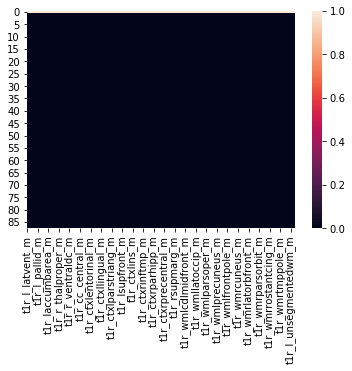

In [6]:
# looks like only the first record has missing data
sns.heatmap(t1r_df.isna())

In [7]:
# Are there any nans beyond the first row?
t1r_df.loc[1:,:].isna().values.any()

False

In [8]:
# since the first row is all nans, we will drop that row
t1r_df.drop(0, axis=0, inplace=True)
t1r_df.head()

/home/jdkent/.local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,t1r_l_latvent_m,t1r_l_latvent_nv,t1r_l_inflatvent_m,t1r_l_inflatvent_nv,t1r_l_cbmwm_m,t1r_l_cbmwm_nv,t1r_l_cbmctx_m,t1r_l_cbmctx_nv,t1r_l_thalproper_m,t1r_l_thalproper_nv,...,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_l_unsegmentedwm_m,t1r_l_unsegmentedwm_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv,t1r_venousblood_m,t1r_venousblood_nv
1,158.093,217.0,335.357,22.0,76.665300,14655.0,77.283500,51754.0,100.9360,8526.0,...,109.553,4521.0,59.8377,927.0,95.05630,724.0,84.45810,1736.0,61.0105,41248.0
2,151.567,246.0,120.507,17.0,88.953800,13294.0,100.712000,52096.0,81.5130,8714.0,...,105.163,4718.0,43.6359,1612.0,74.90810,738.0,77.38230,2110.0,80.5913,37948.0
3,116.295,187.0,0.000,6.0,0.132391,11416.0,0.531013,44469.0,27.4315,7475.0,...,109.258,5400.0,0.0000,1242.0,1.72019,703.0,-3.94339,1871.0,63.9332,29322.0
4,137.606,173.0,135.274,22.0,78.784100,10825.0,91.652200,44206.0,85.7070,8615.0,...,97.500,4582.0,72.0180,1111.0,77.17380,649.0,82.15930,1893.0,95.7019,46854.0
5,212.272,254.0,294.991,34.0,96.990900,13410.0,110.286000,48703.0,107.4960,8192.0,...,126.765,4401.0,12.8967,1157.0,85.63990,586.0,89.07550,1860.0,69.7897,60284.0


In [9]:
# define the group classification
group = bp_df.loc[1:,'group']

In [10]:
# split the data into test/training sets (test size will have 10 participants)
X_train, X_test, y_train, y_test = train_test_split(t1r_df, group, test_size=10, stratify=group)

In [11]:
# look at the training dataset
X_train.head()

,t1r_l_latvent_m,t1r_l_latvent_nv,t1r_l_inflatvent_m,t1r_l_inflatvent_nv,t1r_l_cbmwm_m,t1r_l_cbmwm_nv,t1r_l_cbmctx_m,t1r_l_cbmctx_nv,t1r_l_thalproper_m,t1r_l_thalproper_nv,...,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_l_unsegmentedwm_m,t1r_l_unsegmentedwm_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv,t1r_venousblood_m,t1r_venousblood_nv
67,50.2682,231.0,165.386,25.0,12.1383,11621.0,56.6123,47491.0,38.0588,7486.0,...,97.9518,4408.0,0.00000,1003.0,18.3953,641.0,21.2955,1789.0,80.9121,44401.0
33,107.7900,237.0,270.137,25.0,50.4894,10814.0,65.4111,48120.0,83.9892,10218.0,...,112.2560,3815.0,91.51090,1560.0,78.9920,795.0,77.8944,1977.0,67.3715,37595.0
70,152.9170,212.0,163.997,26.0,79.3317,14253.0,91.9592,60508.0,81.2640,9927.0,...,99.1019,4503.0,52.81490,1307.0,71.7243,769.0,78.4956,2201.0,52.6758,45371.0
47,191.8100,260.0,160.262,26.0,107.5560,15035.0,99.3148,57157.0,92.3275,8830.0,...,85.0746,4398.0,2.47692,1156.0,94.7498,719.0,104.6230,1904.0,91.8825,59761.0
64,271.3950,276.0,114.346,36.0,95.0231,12617.0,63.3463,45470.0,129.0580,8329.0,...,85.9344,4246.0,57.51050,1166.0,113.0210,716.0,141.1520,2063.0,67.8469,35316.0


In [12]:
# look at the testing data
X_test.head()

,t1r_l_latvent_m,t1r_l_latvent_nv,t1r_l_inflatvent_m,t1r_l_inflatvent_nv,t1r_l_cbmwm_m,t1r_l_cbmwm_nv,t1r_l_cbmctx_m,t1r_l_cbmctx_nv,t1r_l_thalproper_m,t1r_l_thalproper_nv,...,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_l_unsegmentedwm_m,t1r_l_unsegmentedwm_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv,t1r_venousblood_m,t1r_venousblood_nv
39,131.813,199.0,133.964,11.0,107.1860,11760.0,92.0457,44129.0,88.32330,8396.0,...,102.9840,2831.0,84.6131,1490.0,81.7504,591.0,84.1699,1769.0,88.7990,58379.0
52,177.409,272.0,188.688,29.0,113.8940,18782.0,100.0330,58731.0,90.05420,10707.0,...,105.6750,5726.0,64.7563,1380.0,84.3992,974.0,85.1947,2548.0,68.6212,79356.0
45,170.939,172.0,141.720,31.0,94.5433,9938.0,128.2840,34321.0,84.98440,9436.0,...,72.5909,4830.0,125.4110,1100.0,80.3395,710.0,83.2631,2076.0,78.7008,42621.0
28,118.800,267.0,168.169,20.0,75.9756,14308.0,81.5050,57236.0,83.96820,10030.0,...,107.7130,4442.0,68.6492,1534.0,73.3356,688.0,79.5643,2168.0,77.2300,59480.0
66,119.888,195.0,-108.745,22.0,62.6684,14046.0,86.1449,52106.0,-9.41691,8527.0,...,82.3260,4805.0,0.0000,1055.0,32.6618,814.0,17.6070,1915.0,85.9405,50138.0


In [13]:
# see how many are Case/Controls in the training dataset
y_train.describe()

count       77
unique       2
top       Case
freq        50
Name: group, dtype: object

In [14]:
# see how many are Case/Controls are in the testing dataset
y_test.describe()

count       10
unique       2
top       Case
freq         6
Name: group, dtype: object

In [15]:
# test pca
pca_test = PCA(n_components=0.99)


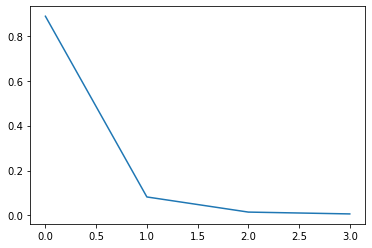

In [16]:
# the first component explains a lot of the variance, but up to 4 could be included
pca_test.fit_transform(X_train)
plt.plot(pca_test.explained_variance_ratio_)

In [17]:
# lets try logistic regression on the raw data
logr_test = LogisticRegression(max_iter=1000, n_jobs=NTHREADS)


In [18]:
logr_test.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=32, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
logr_test.score(X_test, y_test)

0.7

In [20]:
# test to see how different parameters change the fit of the model


In [21]:
# setup a pipeline to run PCA, then run Logistic Regression

# setup PCA
pca = PCA()
# define the options I would like to vary within PCA
n_components_opts = [2, 4, 8]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000)
# define options I would like to vary with logistic regression
penalty_opts = ['l1', 'l2']
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params = [
    {
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
        'clf__penalty': penalty_opts,
        'clf__C': C_opts,
    }
]


pipeline = Pipeline([("pca", pca), ("clf", clf)])

In [22]:
# search the parameter defined above to find the "best" model
search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc')

In [23]:
# fit on the training data
search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                        

In [24]:
# see the parameters for the best model
search.best_params_

{'clf__C': 1.0,
 'clf__penalty': 'l2',
 'pca__n_components': 8,
 'pca__whiten': True}

In [25]:
# get the score for the held out test data
search.score(X_test, y_test)

0.9166666666666667

In [26]:
# see how well the algorithm guessed on the held out testing data
search.predict(X_test) == y_test.values

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True])